# Sentiment Analysis on notable speeches of the last decade

---

This tutorial demonstrates how to build a simple <a href = 'https://en.wikipedia.org/wiki/Long_short-term_memory'> Long Short Term memory network (LSTM) </a> from scratch in NumPy to perform sentiment analysis on a socially relevant and ethically acquired dataset.

Your deep learning model - The LSTM is a form of a Recurrent Neural Network and will learn to classify a piece of text as positive or negative from the IMDB reviews dataset. The dataset contains 40,000 training and 10,000 test reviews and corresponding labels. Based on the numeric representations of these reviews and their corresponding labels <a href = 'https://en.wikipedia.org/wiki/Supervised_learning'> (supervised learning) </a> the neural network will be trained to learn the sentiment using forward propagation and backpropagaton through time since we are dealing with sequential data here. The output will be a vector containing the probabilities that the text samples are positive.

Today, Deep Learning is getting adopted in everyday life and now it is more important to ensure that decisions that have been taken using AI are not reflecting discriminatory behavior towards a set of populations. It is important to take fairness into consideration while consuming the output from AI. Throughout the tutorial we'll try to question all the steps in our pipeline from an ethics point of view.

## Prerequisites 

---

You are expected to be familiar with the Python programming language and array manipulation with NumPy. In addition, some understanding of Linear Algebra and Calculus is recommended. You should also be familiar with how Neural Networks work. For reference, you can visit the [Python](https://docs.python.org/dev/tutorial/index.html), [Linear algebra on n-dimensional arrays](https://numpy.org/doc/stable/user/tutorial-svd.html) and [Calculus](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/multivariable-calculus.html) tutorials.

To get a refresher on Deep Learning basics, You should consider reading [the d2l.ai book](https://d2l.ai/chapter_recurrent-neural-networks/index.html), which is an interactive deep learning book with multi-framework code, math, and discussions. You can also go through the [Deep learning on MNIST from scratch tutorial](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) to understand how a basic neural network is implemented from scratch.

In addition to NumPy, you will be utilizing the following Python standard modules for data loading and processing:
- [`pandas`](https://pandas.pydata.org/docs/) for handling dataframes 
- [`Matplotlib`](https://matplotlib.org/) for data visualization

This tutorial can be run locally in an isolated environment, such as [Virtualenv](https://virtualenv.pypa.io/en/stable/) or [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html). You can use [Jupyter Notebook or JupyterLab](https://jupyter.org/install) to run each notebook cell.

## Table of contents

---

1. Data Collection 

2. Preprocess the datasets

3. Build and train a LSTM network from scratch

4. Perform sentiment analysis on collected speeches 

5. Next steps

## 1. Data Collection
----

Before we begin there are a few pointers you should always keep in mind before choosing the data you wish to train your model on:
- **Identifying Data Bias** - Bias is a component of the human thought process, and data collected from humans therefore inherently reflects that bias. Some ways in which this bias tends to occur in Machine Learning datasets are:
    - *Bias in historical data*: Historical data are often skewed towards, or against, particular groups.
        Data can also be severely imbalanced with limited information on protected groups.
    - *Bias in data collection mechanisms*: Lack of representativeness introduces inherent biases in the data collection process.  
    - *Bias towards observable outcomes*: In some scenarios, we have the information about True Outcomes only for a certain section of the population. In the absence of information on all outcomes, one cannot even measure fairness
- **Preserving human anonymity for sensitive data**: [Trevisan and Reilly](https://eprints.whiterose.ac.uk/91157/1/Ethical%20dilemmas.pdf) identified a list of sensitive topics that need to be handled with extra care. We present the same below along with a few additions:
    - personal daily routines (including location data);
    - individual details about impairment and/or medical records;
    - emotional accounts of pain and chronic illness;
    - financial information about income and/or welfare payments;
    - discrimination and abuse episodes;
    - criticism/praise of individual providers of healthcare and support services;
    - suicidal thoughts;
    - criticism/praise of a power structure especially if it compromises their safety;
    - personally-identifying information (even if anonymized in some way) including things like fingerprints or voice.

>While it can be difficult taking consent from so many people especially on online platforms, the necessity of it depends upon the sensitivity of the topics your data includes and other indicators like whether the platform the data was obtained from allows users to operate under pseudonyms. If the website has a policy that forces the use of a real name, then the users need to be asked for consent.

In this section, you will be collecting two different datasets: the IMDB movie reviews dataset, and a collection of 10 speeches curated for this tutorial including activists from different countries around the world, different times, and different topics. The former would be used to train the deep learning model while the latter will be used to perform sentiment analysis on.

### Collecting the IMDB reviews dataset
IMDB Reviews Dataset is a large movie review dataset collected and prepared by Andrew L. Maas from the popular movie rating service, IMDB. The IMDB Reviews dataset is used for binary sentiment classification, whether a review is positive or negative. It contains 25,000 movie reviews for training and 25,000 for testing. All these 50,000 reviews are labeled data that may be used for supervised deep learning. To make things a bit more comprehensible we're using the `pandas` dataframe version downloaded from [Kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
   > The IMDb platform allows the usage of their public datasets for personal and non-commercial use. We did our best to ensure that these reviews do not contain any of the aforementioned sensitive topics pertaining to the reviewer.

### Collecting and loading the speech transcripts
We have chosen speeches by activists around the globe talking about issues like climate change, feminism, lgbtqa+ rights and racism. These were sourced them from newspapers, the official website of the United Nations and the archives of established universities as cited in the table below. A CSV file was created containing the transcribed speeches, their speaker and the source the speeches were obtained from. 
We made sure to include different demographics in our data and included a range of different topics, most of which focus on social and/or ethical issues. The dataset is subjected to the CC0 Creative Common License, which means that is free for the public to use and there are no copyrights reserved.

| Speech                                           | Speaker                 | Source                                                     |
|--------------------------------------------------|-------------------------|------------------------------------------------------------|
| Barnard College Commencement                     | Leymah Gbowee           | Barnard College - Columbia University official website     |
| UN Speech on youth Education                     | Malala Yousafzai        | Iowa state university archives                             |
| Remarks in the UNGA on racial discrimination     | Linda Thomas Greenfield | United States mission to the United Nation                 |
| How Dare You                                     | Greta Thunberg          | NBC’s official website                                     |
| The speech that silenced the world for 5 minutes | Severn Suzuki           | NTU blogs                                                  |
| The Hope Speech                                  | Harvey Milk             | University of Maryland archives                            |
| Violence against LGBTQA+                         | Michelle Bachelet       | United Nations office of high commisioner official website |
| I have a dream                                   | Martin Luther King      | Brittanica official website

## 2. Preprocess the datasets
>Preprocessing data is an extremely crucial step before building any Deep learning model, however in an attempt to keep the tutorial focused on building the model, we will not dive deep into the code for preprocessing. Given below is a brief overview of all the steps we undertake to clean our data and convert it to its numeric representation. The [code](https://github.com/Dbhasin1/ethics-tutorial/blob/lstm-update/tutorials/text_preprocessing.py) is public and we encourage you to look it up for a better understanding of this section and can make ethical preprocessing choices in your future work.

1. **Text Denoising** : Before converting your text into vectors, it is important to clean it and remove all unhelpful parts a.k.a the noise from your data by converting all characters to lowercase, removing html tags, brackets and stop words (words that don't add much meaning to a sentence). Without this step the dataset is often a cluster of words that the computer doesn't understand.


2. **Converting words to vectors** : A word embedding is a learned representation for text where words that have the same meaning have a similar representation. Individual words are represented as real-valued vectors in a predefined vector space. GloVe is an unsupervised algorithm developed by Stanford for generating word embeddings by generating global word-word co-occurence matrix from a corpus. You can download the zipped files containing the embeddings from https://nlp.stanford.edu/projects/glove/. Here you can choose any of the four options for different sizes or training datasets
 >The GloVe word embeddings include sets that were trained on billions of tokens, some up to 840 billion tokens. These algorithms exhibit stereotypical biases, such as gender bias which can be traced back to the original training data. For example certain occupations seem to be more biased towards a particular gender, reinforcing problematic stereotypes. The nearest solution to this problem are some de-biasing algorithms as the one presented in https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/reports/6835575.pdf which one can use on embeddings of their choice to mitigate bias, if present.

You'll start with importing the necessary packages to build our Deep Learning network

In [1]:
# Importing the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from text_preprocessing import TextPreprocess 
import string

You will need two files for the initial preprocessing:

In [2]:
# Assign the path on your local system where these files reside  
imdb_data_path = '../data/IMDB Dataset.csv'
emb_path = '../data/glove.6B.300d.txt'

Next, you will load the IMDB dataset into a dataframe using Pandas

In [3]:
imdb_df = pd.read_csv(imdb_data_path)

We will use the text preprocessing class imported from the aforementioned [code](https://github.com/Dbhasin1/ethics-tutorial/blob/lstm-update/tutorials/text_preprocessing.py) to carry out the data preprocessing in the `review` column of the imdb dataset:

In [4]:
textproc = TextPreprocess()
X = textproc.cleantext(imdb_df, 'review', remove_stopwords = True, remove_punc = True)

Now, we need to create a split between training and testing datasets. You can vary the `split_percentile` to try different ratios:

In [5]:
# convert the target series in the dataframe to a numpy array
y = imdb_df['sentiment'].to_numpy()
X_train, Y_train, X_test, Y_test = textproc.split_data(X, y, split_percentile=5)

Now, we will apply the same process to the speeches in our dataset:

In [6]:
speech_data_path = '../data/speeches.csv'
speech_df = pd.read_csv(speech_data_path)
X_pred = textproc.cleantext(speech_df, 'speech', remove_stopwords = True, remove_punc = False)
speakers = speech_df['speaker'].to_numpy()

We will load the `GloVe` embeddings file to build a dictionary mapping each word and word embedding. This will act as a cache for when we have to replace each word with its respective word embedding.

In [7]:
emb_matrix = textproc.loadGloveModel(emb_path)

Loading Glove Model
400000  words loaded!


### 3. Build the Deep Learning Model¶
 ---
 It’s time to start implementing our LSTM! You will have to first familiarize yourself with some high-level concepts of the basic building blocks of a deep learning model. You can refer to the [Deep learning on MNIST from scratch tutorial](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) for the same. 

You will then learn how a Recurrent Neural Network differs from a plain Neural Network and what makes it so suitable for processing sequential data. Afterwards, you will construct the building blocks of a simple deep learning model in Python and NumPy and train it to learn to classify the sentiment of a piece of text as positive or negative with a certain level of accuracy

### Introduction to a Long Short Term Memory Network

In an artificial neural network (ANN), the information only moves in one direction — from the input layer, through the hidden layers, to the output layer. The information moves straight through the network and never takes the previous nodes into account at a later stage. Because it only considers the current input, the features learned are not shared across different positions of the sequence. Moreover, it cannot process sequences with varying lengths.

Unlike an ANN, the RNN was designed to work with sequence prediction problems.RNNs introduce state variables to store past information, together with the current inputs, to determine the current outputs. Since an RNN shares the learned features with all the data points in a sequence regardless of its length, it is capable of processing sequences with varying lengths.  

The problem with an RNN however, is that it cannot retain long-term memory because the influence of a given input on the hidden layer, and therefore on the network output, either decays or blows up exponentially as it cycles around the network’s recurrent connections. This shortcoming is referred to as the vanishing gradient problem. Long Short-Term Memory (LSTM) is an RNN architecture specifically designed to address the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

### Overview of the Model Architecture 

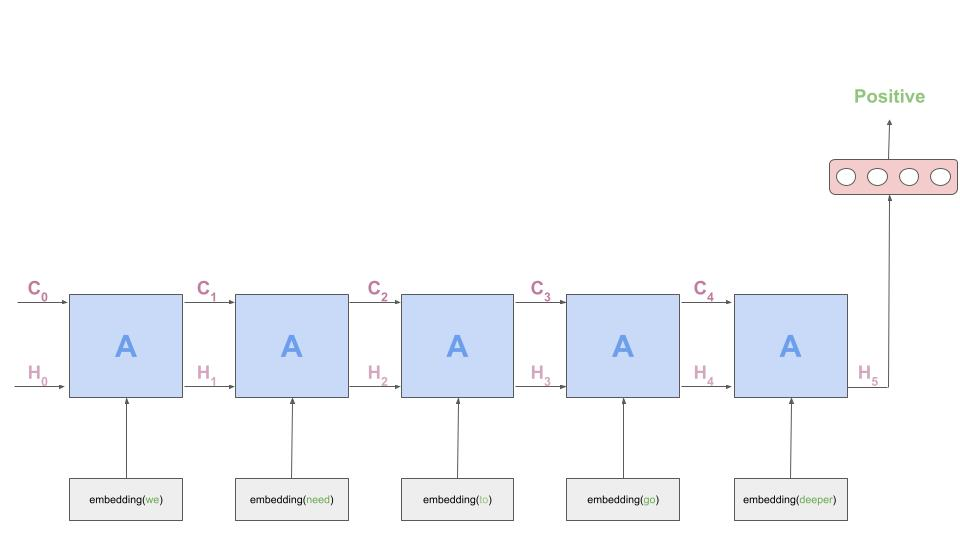

In the above image, The rectangles labelled 'A' are called `Cells` and they are the **Memory Blocks** of our LSTM network. They are responsible for choosing what to remember in a sequence and pass on that information to the next cell via two states called the `hidden state` $H_{t}$ and the `cell state` $C_{t}$ where $t$ indicates the time-step. To know how these states are calculated you'll need to understand the mechanisms happening inside a cell, we will recommend you to go through [ Long Short-Term Memory (LSTM)](http://d2l.ai/chapter_recurrent-modern/lstm.html).

### But how do we obtain sentiment from the LSTM's output?
The hidden state we obtain from the last word in our sequence is considered to be a representation of all the information contained in a sequence. To classify this information into various classes (2 in our case, positive and negative) we can use a Fully Connected layer which firstly maps this information to a predefined output size (1 in our case) and an activation layer like sigmoid on top of it finally converts the output to a value between 0 and 1. We'll consider values greater than 0.5 to be indicative of a positive sentiment.

Define a function to randomly initialise the parameters which will be learnt while our model trains

In [8]:
def initialise_params (hidden_dim, input_dim):
        Wf = np.random.randn(hidden_dim, hidden_dim + input_dim) # forget gate 
        bf = np.random.randn(hidden_dim, 1)
        Wi = np.random.randn(hidden_dim, hidden_dim + input_dim) # input gate 
        bi = np.random.randn(hidden_dim, 1)
        Wcm = np.random.randn(hidden_dim, hidden_dim + input_dim) # candidate memory gate 
        bcm = np.random.randn(hidden_dim, 1)
        Wo = np.random.randn(hidden_dim, hidden_dim + input_dim) # output gate 
        bo = np.random.randn(hidden_dim, 1)
        
        W2 = np.random.randn(1, hidden_dim) # fully connected classification layer 
        b2 = np.zeros((1, 1))

        parameters = {"Wf": Wf, "bf": bf, "Wi": Wi, "bi": bi, "Wcm": Wcm, "bcm": bcm, "Wo": Wo, "bo": bo, "W2": W2, "b2": b2}
        return parameters    

### Forward Propagation

Now that we have our initialised parameters we pass the input data in a forward direction through the network. Each layer accepts the input data, processes it and passes it to the successive layer. This process is called `Forward Propagation`. You will undertake the following mechanism to implement the same:
- Loading the word embeddings of the input data
- Passing the embeddings to an LSTM to obtain the output of the final cell
- Passing the final output from the LSTM through a fully connected layer to obtain the probability with which the sequence is positive 
- Storing all the intermediate outputs in a cache to utilise during backpropagation

Define a function to calculate the sigmoid of a matrix

In [57]:
def sigmoid(x):
    return np.exp(np.fmin(x, 0)) / (1 + np.exp(-np.abs(x)))

Define a function to carry out forward propagation

In [58]:
def forward_prop (X_vec, parameters):
    
    hidden_dim = parameters['Wf'].shape[0]
    time_steps = len(X_vec)
    
    # Initialise hidden and cell state before passing to first time step
    prev_hidden_state = np.zeros((hidden_dim, 1))
    prev_cell_state = np.zeros(prev_hidden_state.shape)
    
    # Store all the intermediate and final variables here 
    caches = {'lstm_values':[], 'fc_values':[]}
    
    # Hidden state from the last cell in the LSTM layer is calculated.
    for t in range(time_steps):
        
        x = X_vec[t]
        # Retrieve embedding for one word for each time step
        X_t = emb_matrix.get(x, np.random.rand(300,1))
        X_t = X_t.reshape((300,1))
        
        # Concatenate prev_hidden_state and xt
        concat = np.vstack((prev_hidden_state, X_t))
        
        # Calculate output of the forget gate 
        ft = sigmoid(np.dot(parameters['Wf'], concat) + parameters['bf'])
        
        # Calculate output of the input gate 
        it = sigmoid(np.dot(parameters['Wi'], concat) + parameters['bi']) 
        cmt = np.tanh(np.dot(parameters['Wcm'], concat) + parameters['bcm'])
        io = it * cmt 
        
        # Update the cell state 
        next_cell_state = (ft * prev_cell_state) + io
        
        # Calculate output of the output gate 
        ot = sigmoid(np.dot(parameters['Wo'], concat) + parameters['bo'])
        
        # Update the hidden input 
        next_hidden_state =  ot * np.tanh(next_cell_state)
        
        # store values needed for backward propagation in cache
        cache = (next_hidden_state, next_cell_state, prev_hidden_state, prev_cell_state, ft, it, cmt, ot, X_t)
        caches['lstm_values'].append(cache)
        
        # Update hidden state and cell state for next time step
        prev_hidden_state = next_hidden_state
        prev_cell_state = next_cell_state

    # Pass through a fully connected layer to perform binary classification 
    z2 = np.dot(parameters['W2'], next_hidden_state) + parameters['b2']
    a2 = sigmoid(z2)
    cache = (a2, parameters['W2'])
    caches['fc_values'].append(cache)
    
    return caches 

### Backpropagation

After each forward pass through the network, you will implement the `backpropagation through time` algorithm to accumulate gradients of each parameter over the time steps. Backpropagation through a LSTM is not as straightforward as through other common Deep Learning architectures, due to the special way its underlying layers interact. Nonetheless, the approach is largely the same; identifying dependencies and applying the chain rule.

Lets start with defining a function to initialise gradients of each parameter as arrays made up of zeros with same dimensions as the corresponding parameter

In [59]:
# Initialise the gradients 
def initialise_grads (parameters):
    grads = {}
    for param in parameters.keys():
        grads[f'd{param}'] = np.zeros((parameters[param].shape))
    return grads    

Now we'll define a function to calculate the gradients of each intermediate value in the neural network with respect to the loss and accumulate those gradients over the entire sequence. To understand how the gradients are calculated at each step in greater depth, you are suggested to follow this helpful [blog](https://christinakouridi.blog/2019/06/19/backpropagation-lstm/) by Christina Kouridi

In [60]:
 def backprop (y, caches, hidden_dim, input_dim, time_steps, parameters):
    # Retrieve output and corresponding weights of fully connected layer
    A2, W2 = caches['fc_values'][0]
    # Retrieve hidden state calculated in the last time step
    h_last = caches['lstm_values'][-1][0]
    
    pred_value = np.array(A2)
    target_value = np.array(y)
    
    # Initialise gradients 
    gradients = initialise_grads(parameters)
    
    # Calculate gradients of the fully connected layer 
    # dZ2 = dL/da2 * da2/dZ2
    dZ2 = pred_value - target_value
    # dW2 = dL/da2 * da2/dZ2 * dZ2/dW2
    gradients['dW2'] = np.dot(dZ2, h_last.T)
    # db2 = dL/da2 * da2/dZ2 * dZ2/db2
    gradients['db2'] = np.sum(dZ2)
    
    # Gradient of Loss w.r.t the last hidden output of the LSTM 
    # dh_last = dZ2 * W2 
    dh_last = np.dot(W2.T, dZ2)  
    
    # Initialise gradients w.r.t previous hidden state and cell state 
    dh_prev = dh_last
    dc_prev = np.zeros((dh_prev.shape))
    
    # loop back over the whole sequence
    for t in reversed(range(time_steps)):
        cache = caches['lstm_values'][t]
        
        # Retrieve parameters from "parameters"
        Wf = parameters["Wf"]
        Wi = parameters["Wi"]
        Wcm = parameters["Wcm"]
        Wo = parameters["Wo"]

        # Retrieve information from "cache"
        (next_hidden_state, next_cell_state, prev_hidden_state, prev_cell_state, ft, it, cmt, ot, X_t) = cache
        # Input to gates of LSTM is [prev_hidden_state, X_t]
        concat = np.concatenate((prev_hidden_state, X_t), axis=0)
        
        # Compute gates related derivatives
        # Calculate derivative w.r.t the parameters of forget gate 
        # dft = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dc_prev * dc_prev/dft
        dft = (dc_prev * prev_cell_state + ot * (1 - np.square(np.tanh(next_cell_state))) * prev_cell_state * dh_prev) * ft * (1 - ft)
        # dWf = dft * dft/dWf
        gradients['dWf'] += np.dot(dft, concat.T)
         # dbf = dft * dft/dbf
        gradients['dbf'] += np.sum(dft, axis=1, keepdims=True)
        # dh_f = dft * dft/dh_prev
        dh_f =  np.dot(Wf[:, :hidden_dim].T, dft)
        
        # Calculate derivative w.r.t the parameters of input gate 
        # dit = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dc_prev * dc_prev/dit
        dit = (dc_prev * cmt + ot * (1 - np.square(np.tanh(next_cell_state))) * cmt * dh_prev) * it * (1 - it)
        # dcmt = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dc_prev * dc_prev/dcmt
        dcmt = (dc_prev * it + ot * (1 - np.square(np.tanh(next_cell_state))) * it * dh_prev) * (1 - np.square(cmt))
        # dWi = dit * dit/dWi
        gradients['dWi'] += np.dot(dit, concat.T)
        # dWcm = dcmt * dcmt/dWcm
        gradients['dWcm'] += np.dot(dcmt, concat.T)
        # dbi = dit * dit/dbi
        gradients['dbi'] += np.sum(dit, axis=1, keepdims=True)
        # dWcm = dcmt * dcmt/dbcm
        gradients['dbcm'] += np.sum(dcmt, axis=1, keepdims=True)
        # dhi = dit * dit/dh_prev
        dh_i =  np.dot(Wi[:, :hidden_dim].T, dit)
        # dhcm = dcmt * dcmt/dh_prev
        dh_cm = np.dot(Wcm[:, :hidden_dim].T, dcmt)
        
        # Calculate derivative w.r.t the parameters of output gate 
        # dot = dL/da2 * da2/dZ2 * dZ2/dh_prev * dh_prev/dot 
        dot = dh_prev * np.tanh(next_cell_state) * ot * (1 - ot)
        # dWo = dot * dot/dWo
        gradients['dWo'] += np.dot(dot, concat.T)
        # dbo = dot * dot/dbo
        gradients['dbo'] += np.sum(dot, axis=1, keepdims=True)
        # dho = dot * dot/dho
        dh_o = np.dot(Wo[:, :hidden_dim].T, dot)
       
        # Compute derivatives w.r.t previous hidden state and the previous cell state 
        dh_prev = dh_f + dh_i + dh_cm + dh_o 
        dc_prev = dc_prev * ft + ot * (1 - np.square(np.tanh(next_cell_state))) * ft * dh_prev
        
    return gradients

### Updating the Parameters 

We update the parameters through an optimization algorithm called [Adam](https://optimization.cbe.cornell.edu/index.php?title=Adam) which is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing. Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters `beta1` and `beta2` control the decay rates of these moving averages. Adam has shown increased convergence and robustness over other gradient descent algorithms and is often recommended as the default optimizer for training.

Define a function to initialise the moving averages for each parameter

In [61]:
# initialise the moving averages
def initialise_mav (hidden_dim, input_dim, params):
    v = {}
    s = {}
    # Initialize dictionaries v, s
    for key in params:
        v['d'+ key] = np.zeros(params[key].shape)
        s['d'+ key] = np.zeros(params[key].shape)        
    # Return initialised moving averages 
    return v,s 

Define a function to update the parameters

In [62]:
# Update the parameters using Adam optimization 
def update_parameters (parameters, gradients, v, s, learning_rate=0.01, beta1=0.9, beta2=0.999):    
    for key in parameters:
        # Moving average of the gradients
        v['d'+ key] = beta1 * v['d'+ key] + (1 - beta1) * gradients['d'+ key]

        # Moving average of the squared gradients
        s['d'+ key] = beta2 * s['d'+ key] + (1 - beta2) * (gradients['d'+ key] ** 2)

        # Update parameters
        parameters[key] = parameters[key] - learning_rate * v['d' + key] / np.sqrt(
            s['d'+ key] + 1e-8)
    # Return updated parameters and moving averages 
    return parameters, v, s  

### Training the Network
---

You will start by initialising all the parameters and hyperparameters being used in your network

In [63]:
hidden_dim = 64
input_dim = 300
learning_rate = 0.001
epochs = 20
parameters = initialise_params(hidden_dim, input_dim)
v,s = initialise_mav(hidden_dim, input_dim, parameters)

To optimise your deep learning network, you need to calculate a loss based on how well the model is doing on the training data. Loss value implies how poorly or well a model behaves after each iteration of optimization. <br>
Define a function to calculate the loss using [negative log likelihood](http://d2l.ai/chapter_linear-networks/softmax-regression.html?highlight=negative%20log%20likelihood#log-likelihood)

In [64]:
def loss_f(A, Y):
    # define value of epsilon to prevent zero division error inside a log 
    epsilon = 1e-5
    # Implement formula for negative log likelihood 
    loss = - Y * np.log(A + epsilon) - (1 - Y) * np.log(1 - A + epsilon)
    # Return loss
    return np.squeeze(loss)

Set up the neural network's learning experiment with a training loop and start the training process.
>Skip running this cell if you already have the trained parameters stored in a `npy` file

2500it [01:26, 28.75it/s]


Epoch 1 finished. 	  Loss : 1.3089804927787818


2500it [01:30, 27.59it/s]


Epoch 2 finished. 	  Loss : 1.0447027179878041


2500it [01:31, 27.31it/s]


Epoch 3 finished. 	  Loss : 0.9402606826425434


2500it [01:36, 25.84it/s]


Epoch 4 finished. 	  Loss : 0.903932497691605


2500it [01:48, 23.11it/s]


Epoch 5 finished. 	  Loss : 0.8092849718235037


2500it [02:05, 19.98it/s]


Epoch 6 finished. 	  Loss : 0.7586741440891386


2500it [02:28, 16.81it/s]


Epoch 7 finished. 	  Loss : 0.7738827219046464


2500it [02:13, 18.78it/s]


Epoch 8 finished. 	  Loss : 0.758100214378677


2500it [02:07, 19.63it/s]


Epoch 9 finished. 	  Loss : 0.7616461546461332


2500it [02:09, 19.38it/s]


Epoch 10 finished. 	  Loss : 0.7461931838106999


2500it [02:09, 19.35it/s]


Epoch 11 finished. 	  Loss : 0.7449386691227162


2500it [02:12, 18.87it/s]


Epoch 12 finished. 	  Loss : 0.7194154589828043


2500it [20:51,  2.00it/s]


Epoch 13 finished. 	  Loss : 0.7077492213478099


2500it [01:20, 31.21it/s]


Epoch 14 finished. 	  Loss : 0.7126474236928246


2500it [01:24, 29.70it/s]


Epoch 15 finished. 	  Loss : 0.7150054847360994


2500it [01:25, 29.30it/s]


Epoch 16 finished. 	  Loss : 0.7206527964980027


2500it [01:33, 26.62it/s]


Epoch 17 finished. 	  Loss : 0.7659447034662721


2500it [01:30, 27.77it/s]


Epoch 18 finished. 	  Loss : 0.7341348109614056


2500it [01:31, 27.27it/s]


Epoch 19 finished. 	  Loss : 0.7634600104025436


2500it [01:39, 25.03it/s]

Epoch 20 finished. 	  Loss : 0.7093989508520403


Text(0, 0.5, 'training loss')

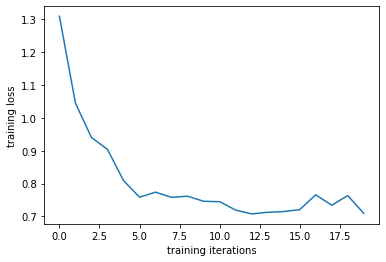

In [65]:
# To store training losses 
training_losses = []

# This is a training loop.
# Run the learning experiment for a defined number of epochs (iterations).
for epoch in range(epochs):
    #################
    # Training step #
    #################
    j = []
    for sample, target in zip(X_train, Y_train):
        # split text sample into words/tokens 
        b = textproc.word_tokeniser(sample)
        
        # Forward propagation/forward pass:
        caches = forward_prop(b, parameters)
        
        # Backward propagation/backward pass:
        gradients = backprop(target, caches, hidden_dim, input_dim, len(b), parameters)
        
        # Update the weights and biases for the LSTM and fully connected layer 
        parameters, v, s = update_parameters (parameters, gradients, v, s, learning_rate=learning_rate, 
                                              beta1=0.999, beta2=0.9)
        
        # Measure the training error (loss function) between the actual
        # sentiment (the truth) and the prediction by the model.
        y_pred = caches['fc_values'][0][0]
        loss = loss_f(y_pred, target)

        # Store training set losses
        j.append(loss)
        
    # Calculate average of training losses for one epoch
    mean_cost = np.mean(j)
    training_losses.append(mean_cost)
    print(f'Epoch {epoch + 1} finished. \t  Loss : {mean_cost}')

# save the trained parameters to a npy file 
np.save('parameters.npy',parameters)
# plot the training loss
plt.plot([i for i in range(len(training_losses))], training_losses)
plt.xlabel("training iterations")
plt.ylabel("training loss")

### Sentiment Analysis on the Speech Data
---

Once our model is trained, we can use the updated parameters to start making our predicitons. We break each speech into paragraphs of uniform size before passing them to the Deep Learning model and predicting the sentiment of each paragraph

In [66]:
# To store predicted sentiments 
predictions = {}

# define the length of a paragraph
para_len = 100

# Retrieve trained values of the parameters
parameters = np.load('parameters.npy', allow_pickle='TRUE').item()

# This is the prediction loop.
for index, text in enumerate(X_pred):
    
    paras = textproc.text_to_paras(text, para_len)
    pred_sents = []
    
    for para in paras:
        # split text sample into words/tokens 
        para_tokens = textproc.word_tokeniser(para)
        # Forward Propagation
        caches = forward_prop(para_tokens, parameters)
    
        # Retrieve the output of the fully connected layer 
        sent_prob = caches['fc_values'][0][0][0][0]
        pred_sents.append(sent_prob)

    threshold = 0.5
    pred_sents = np.array(pred_sents)
    # Mark all predictions > threshold as positive and < threshold as negative 
    pred = np.zeros(pred_sents.shape)
    pos_indices = np.where(pred_sents > threshold)  # indices where output > 0.5
    neg_indices = np.where(pred_sents < threshold)  # indices where output < 0.5
    # Store predictions and corresponding piece of text
    predictions[speakers[index]] = {'pos_paras': paras[pos_indices[0]], 'neg_paras': paras[neg_indices[0]]}

Visualising our predictions using `Matplotlib`:

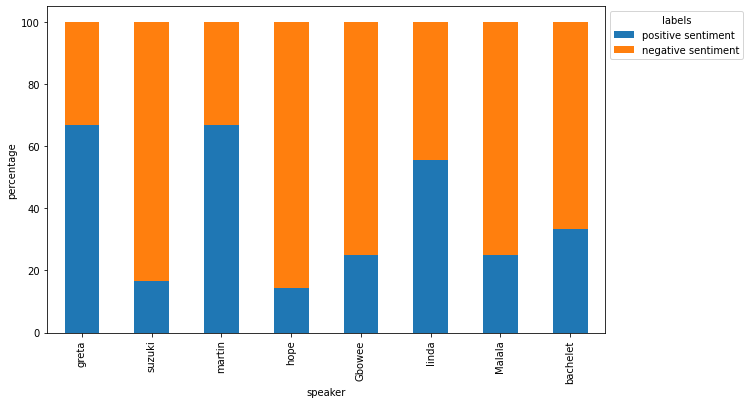

In [67]:
x_axis = []
data = {'positive sentiment':[], 'negative sentiment':[]}
for speaker in predictions:
    # The speakers will be used to label the x-axis in our plot 
    x_axis.append(speaker)
    # Obtain percentage of paragraphs with positive predicted sentiment 
    pos_perc = len(predictions[speaker]['pos_paras'])/(len(predictions[speaker]['pos_paras']) + len(predictions[speaker]['neg_paras']))
    # Store positive and negative percentages 
    data['positive sentiment'].append(pos_perc*100)
    data['negative sentiment'].append(100*(1-pos_perc))    

index = pd.Index(x_axis, name='speaker')
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('percentage')
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In the plot above, you're shown what percentages of each speech are expected to carry a positive and negative  sentiment. Since this implementation prioritised simplicity and clarity over performance, we cannot expect these results to be much accurate. Moreover, while making the sentiment predictions for one paragraph we did not use the neighbouring paragraphs for context which would have led to more accurate predictions. We encourage the reader to play around with the model and make some tweaks suggested in `Next Steps` and observe how the model performance changes.

### Looking at our Neural Network from an ethical perspective
---

It's crucial to understand that accurately identifying a text's sentiment is not easy primarily because of the complex ways in which humans express sentiment, using irony, sarcasm, humor, or, in social media, abbreviation. Moreover neatly placing text into two categories: 'positive' and 'negative' can be problematic because it is being done without any context. Words or abbreviations can convey very different sentiments depending on age and location, none of which we took into account while building our model.

Along with data, there are also growing concerns that data processing algorithms are influencing policy and daily lives in ways that are not transparent and introduce biases. Certain biases such as the [Inductive Bias](https://en.wikipedia.org/wiki/Inductive_bias#:~:text=The%20inductive%20bias%20(also%20known,that%20it%20has%20not%20encountered.&text=The%20kind%20of%20necessary%20assumptions,in%20the%20phrase%20inductive%20bias) are absolutely essential to help a Machine Learning model generalise better, for example the LSTM we built earlier is biased towards preserving contextual information over long sequences which makes it so suitable for processing sequential data. The problem arises when [societal biases](https://hbr.org/2019/10/what-do-we-do-about-the-biases-in-ai) creep into algorithmic predictions. Optimizing Machine algorithms via methods like [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization) can then further amplify these biases by learning every bit of information in the data. 


There are also cases where bias is only in the output and not the inputs (data, algorithm). For example, in sentiment analysis [accuracy tends to be higher on female-authored texts than on male-authored ones]( https://doi.org/10.3390/electronics9020374). End users of sentiment analysis should be aware that its small gender biases can affect the conclusions drawn from it and apply correction factors when necessary. Hence, it is important that demands for algorithmic accountability should include the ability to test the outputs of a system, including the ability to drill down into different user groups by gender, ethnicity and other characteristics, to identify, and hopefully suggest corrections for, system output biases.

### Next Steps
---

You have learned how to build and train a simple Long Short Term Memory network from scratch using just NumPy to perform sentiment analysis.

To further enhance and optimize your neural network model, you can consider one of a mixture of the following:

- Increase the training sample size by increasing the `split_percentile`.
- Alter the architecture by introducing multiple LSTM layers to make the network deeper.
- Use a higher epoch size to train longer and add more regularization techniques, such as early stopping, to prevent overfitting.
- Introduce a validation set for an unbiased valuation of the model fit.
- Apply batch normalization for faster and more stable training.
- Tune other parameters, such as the learning rate and hidden layer size.
- Initialise weights using [Xavier Initialisation](https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html) to prevent vanishing/exploding gradients instead of initialising them randomly.
- Replace LSTM with a [Bidirectional LSTM](https://en.wikipedia.org/wiki/Bidirectional_recurrent_neural_networks) to use both left and right context for predicting sentiment.

Nowadays, LSTMs have been replaced by the [Transformer](https://jalammar.github.io/illustrated-transformer/)( which uses [Attention](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/) to tackle all the problems that plague an LSTM such as as lack of [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning), lack of [parallel training](https://web.stanford.edu/~rezab/classes/cme323/S16/projects_reports/hedge_usmani.pdf) and a long gradient chain for lengthy sequences

Building a neural network from scratch with NumPy is a great way to learn more about NumPy and about deep learning. However, for real-world applications you should use specialized frameworks — such as PyTorch, JAX, TensorFlow or MXNet — that provide NumPy-like APIs, have built-in automatic differentiation and GPU support, and are designed for high-performance numerical computing and machine learning.

Finally, to know more about how ethics come into play when developing a machine learning model, you can refer to the following resources :
- Data ethics resources by the Turing Institute. https://www.turing.ac.uk/research/data-ethics
- Considering how artificial intelligence shifts power, an [article](https://www.nature.com/articles/d41586-020-02003-2) and [talk](https://slideslive.com/38923453/the-values-of-machine-learning) by Pratyusha Kalluri
- More ethics resources on [this blog post](https://www.fast.ai/2018/09/24/ai-ethics-resources/) by Rachel Thomas and the [Radical AI podcast](https://www.radicalai.org/)